# Project - Supervised Learning

1. Sector: Banking
2. Objective: This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

In [318]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os,sys
from sklearn import metrics
import scipy.stats

# 1. Reading and Checking the Data

In [4]:
d1=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [5]:
d1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# 2. Cleaning the data

In [6]:
# removing Id as it may not contribute in analysis
d1=d1.drop("ID",axis=1)

In [7]:
d1.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
# Shape of the dataframe (Rows, Column)
d1.shape
print(f"Shape of data: {d1.shape}")
print(f"Number of rows:= {d1.shape[0]}")
print(f"Number of Columns:= {d1.shape[1]}")
#d1.shape[1]

Shape of data: (5000, 13)
Number of rows:= 5000
Number of Columns:= 13


In [22]:
#checking Null columns
d1_null=d1.isnull().sum()
d1_null

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [23]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [26]:
d1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [18]:
# Printing unique values for few categorical varaibles to undersstand the number of unique values
print(f"Family size unique:{d1.Family.unique()}")
print(f"Education unique:{d1.Education.unique()}")
print(f"CreditCard:{d1.CreditCard.unique()}")

Family size unique:[4 3 1 2]
Education unique:[1 2 3]
CreditCard:[0 1]


# 3. EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008402FD7A88>,
      dtype=object)

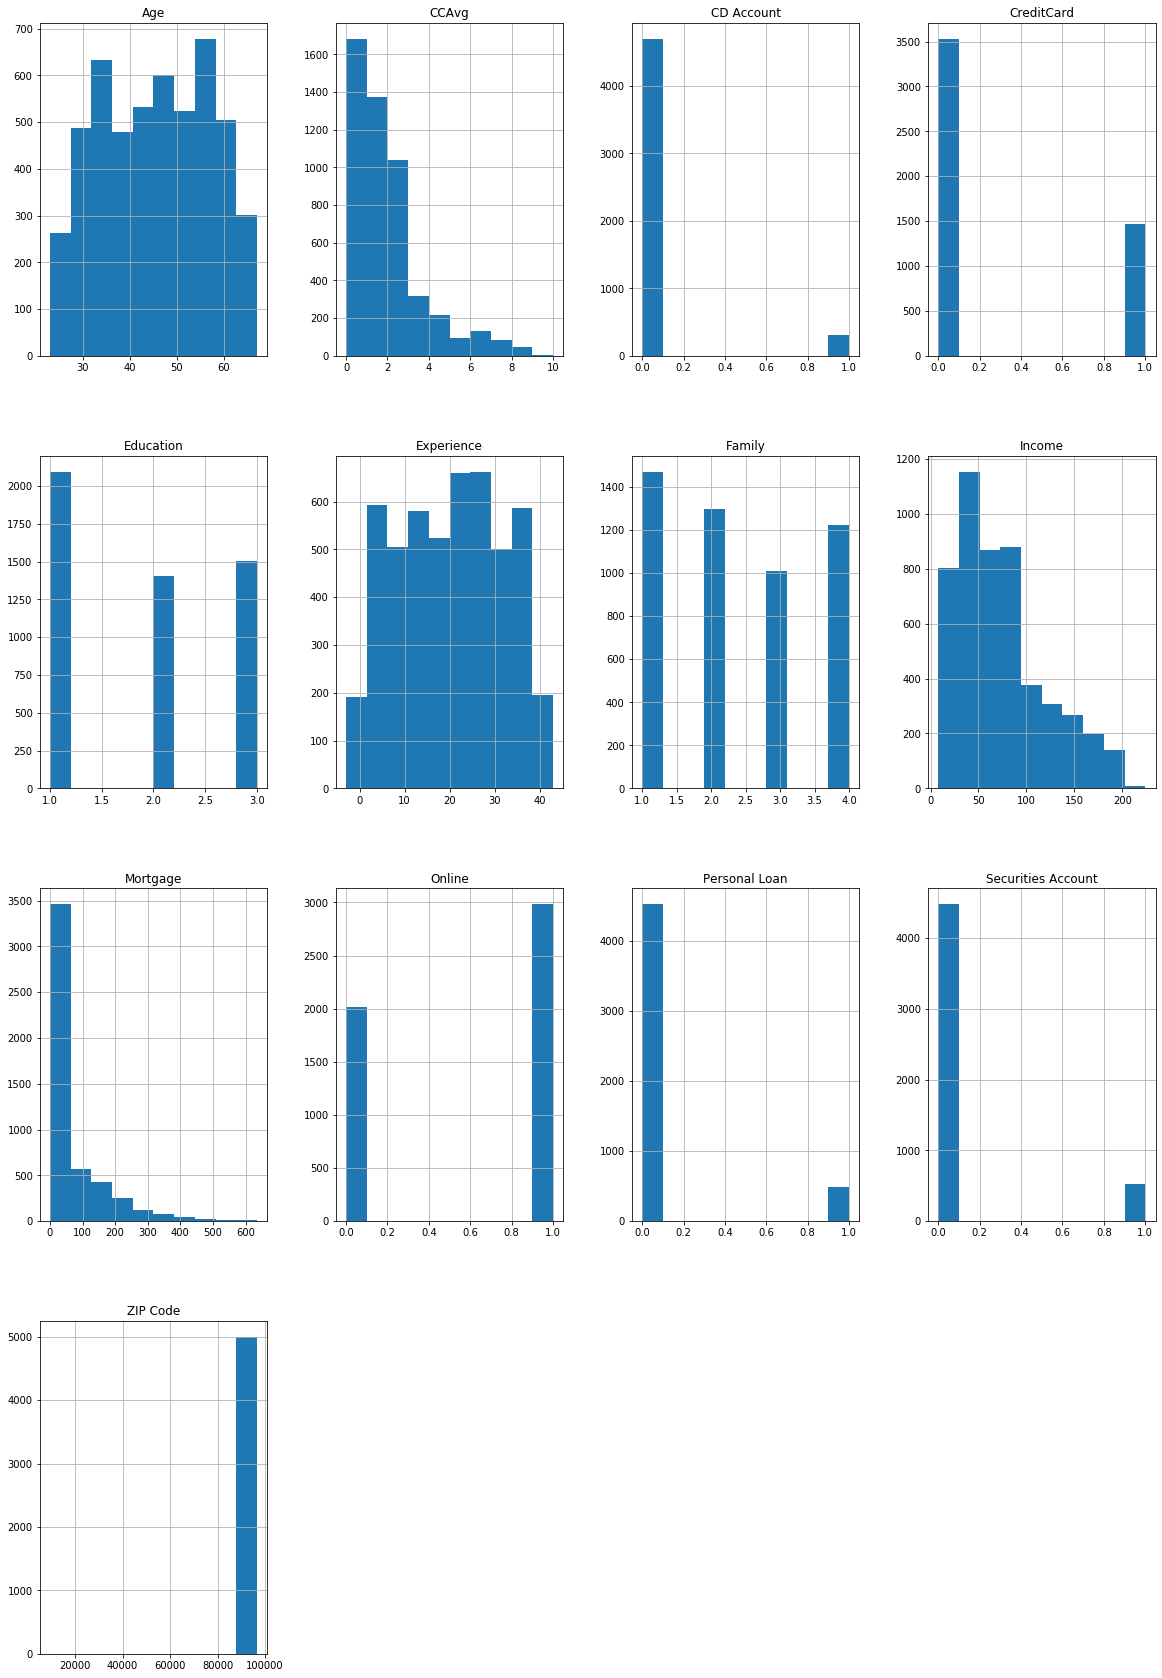

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

d1.hist(figsize=(20,30))

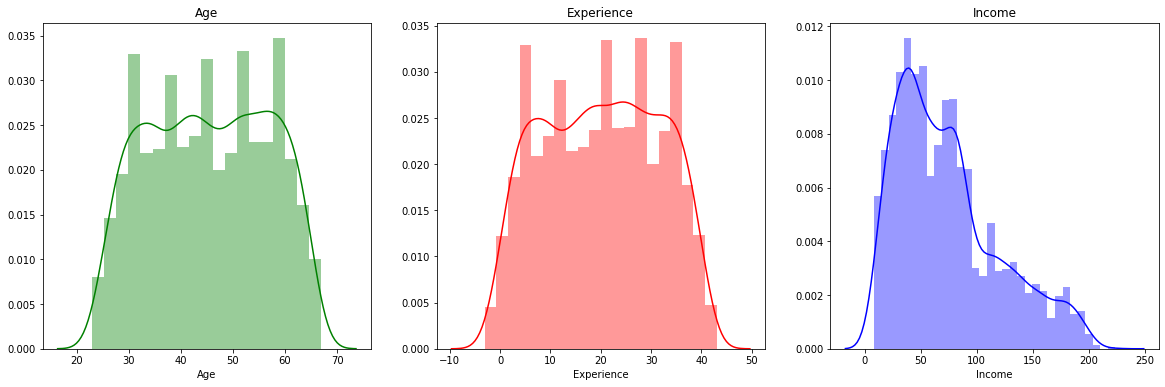

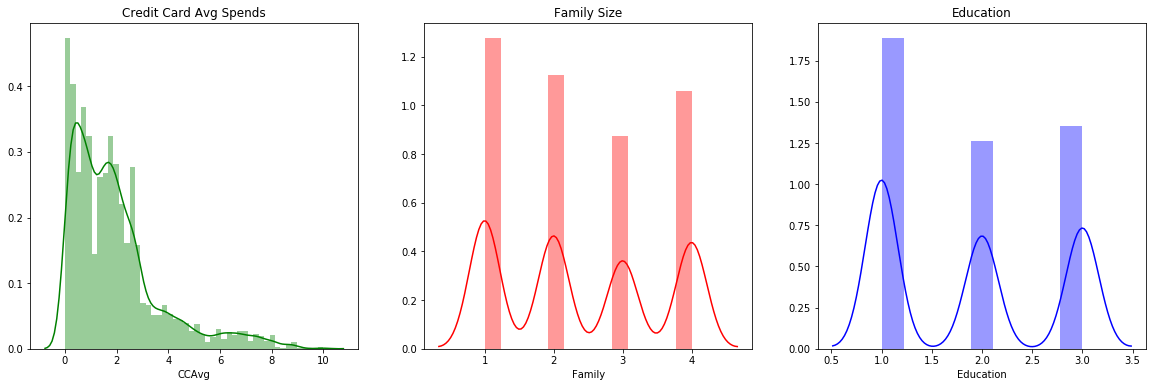

In [57]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Age')
sns.distplot(d1['Age'],color='green')

plt.subplot(1,3,2)
plt.title('Experience')
sns.distplot(d1['Experience'],color='red')

plt.subplot(1,3,3)
plt.title('Income')
sns.distplot(d1['Income'],color='blue')

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Credit Card Avg Spends')
sns.distplot(d1['CCAvg'],color='green')

plt.subplot(1,3,2)
plt.title('Family Size')
sns.distplot(d1['Family'],color='red')

plt.subplot(1,3,3)
plt.title('Education')
sns.distplot(d1['Education'],color='blue')



In [322]:
#d1['CCAvg'].mean()
#d1['Income'].median()
#d1['Income'].mode()

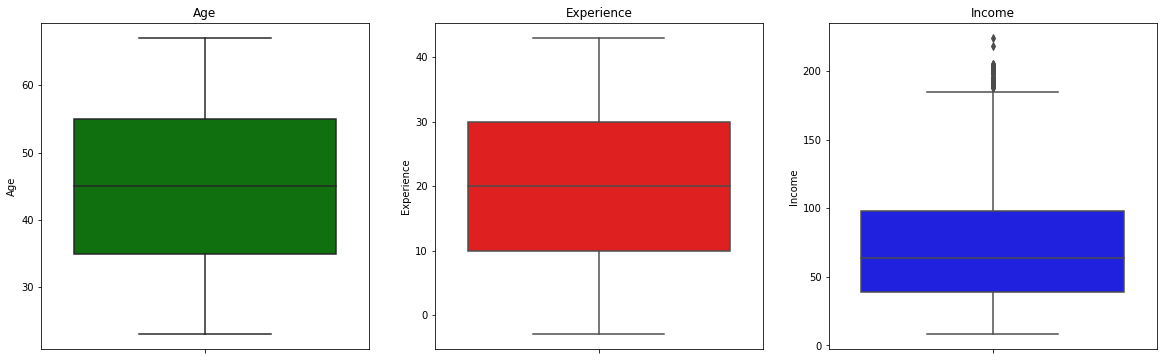

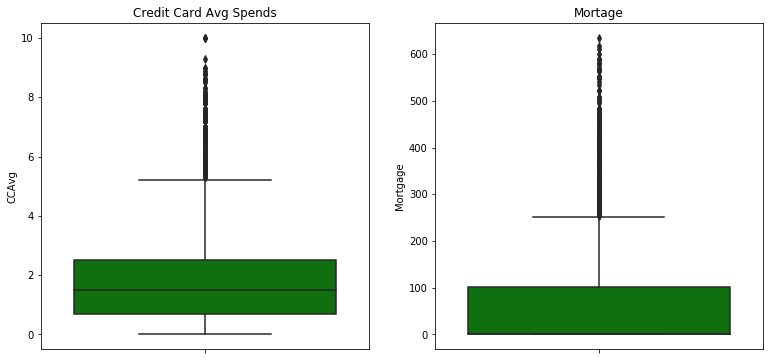

In [33]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Age')
sns.boxplot(d1['Age'],orient='vertical',color='green')

plt.subplot(1,3,2)
plt.title('Experience')
sns.boxplot(d1['Experience'],orient='vertical',color='red')

plt.subplot(1,3,3)
plt.title('Income')
sns.boxplot(d1['Income'],orient='vertical',color='blue')

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title('Credit Card Avg Spends')
sns.boxplot(d1['CCAvg'],orient='vertical',color='green')

plt.subplot(1,3,2)
plt.title('Mortage')
sns.boxplot(d1['Mortgage'],orient='vertical',color='green')


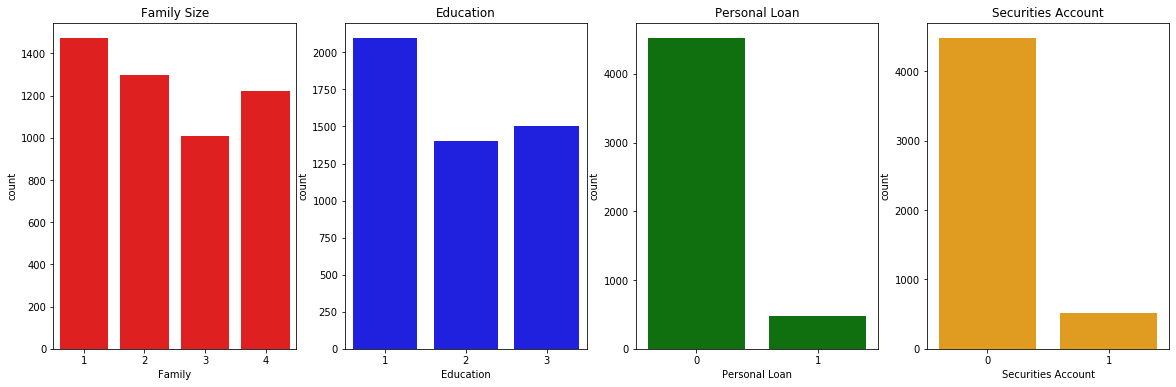

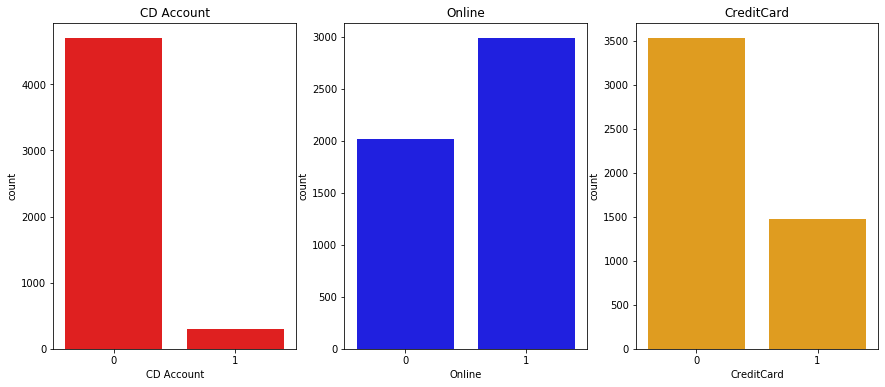

In [36]:
# Count for categorical columns
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.title('Family Size')
sns.countplot(d1['Family'],orient='vertical',color='red')

plt.subplot(1,4,2)
plt.title('Education')
sns.countplot(d1['Education'],orient='vertical',color='blue')

plt.subplot(1,4,3)
plt.title('Personal Loan')
sns.countplot(d1['Personal Loan'],orient='vertical',color='green')

plt.subplot(1,4,4)
plt.title('Securities Account')
sns.countplot(d1['Securities Account'],orient='vertical',color='orange')

plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
plt.title('CD Account')
sns.countplot(d1['CD Account'],orient='vertical',color='red')

plt.subplot(1,4,2)
plt.title('Online')
sns.countplot(d1['Online'],orient='vertical',color='blue')

plt.subplot(1,4,3)
plt.title('CreditCard')
sns.countplot(d1['CreditCard'],orient='vertical',color='orange')

# 3. Undersnatding the target column- Personal Loan

In [118]:
d1_cont=d1.iloc[:,[0,1,2,5,7,8]]
d1_cont
d1_catg=d1.iloc[:,[3,4,6,8,9,10,11,12]]
d1_catg

#pd.count()
pd.pivot_table(d1,index='Personal Loan')

#sns.countplot(d1['Personal Loan'])

,Age,CCAvg,CD Account,CreditCard,Education,Experience,Family,Income,Mortgage,Online,Securities Account,ZIP Code
Personal Loan,,,,,,,,,,,,
0,45.367257,1.729009,0.035841,0.293584,1.843584,20.132301,2.373451,66.237389,51.789381,0.595796,0.102212,93152.428761
1,45.066667,3.905354,0.291667,0.297917,2.233333,19.843750,2.612500,144.745833,100.845833,0.606250,0.125000,93153.202083


In [305]:
prop_Y = d1['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


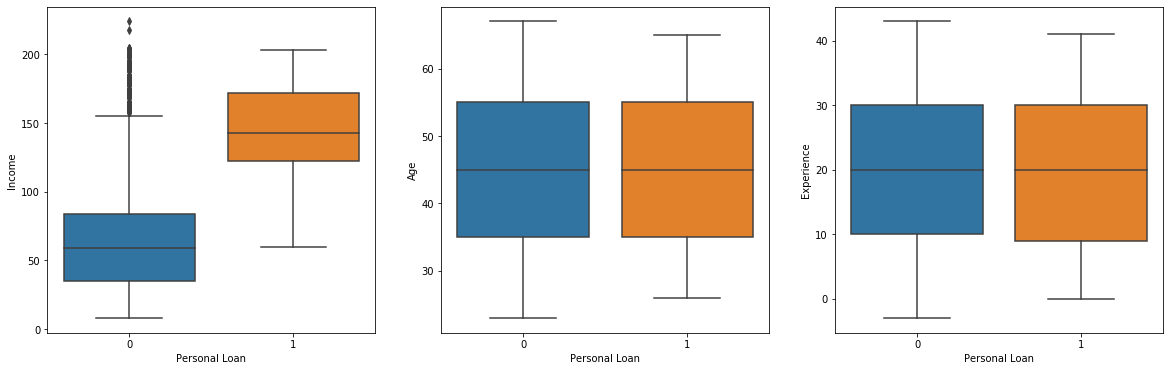

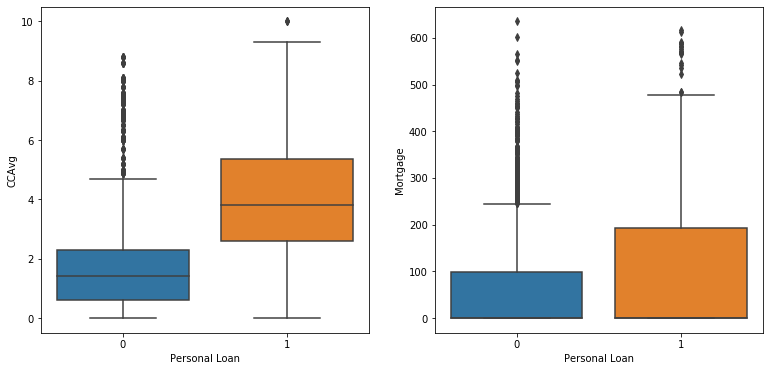

In [127]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x='Personal Loan',y='Income',data=d1)

plt.subplot(1,3,2)
sns.boxplot(x='Personal Loan',y='Age',data=d1)

plt.subplot(1,3,3)
sns.boxplot(x='Personal Loan',y='Experience',data=d1)

plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(x='Personal Loan',y='CCAvg',data=d1)

plt.subplot(1,3,2)
sns.boxplot(x='Personal Loan',y='Mortgage',data=d1)


#1.describe('Personal Loan')

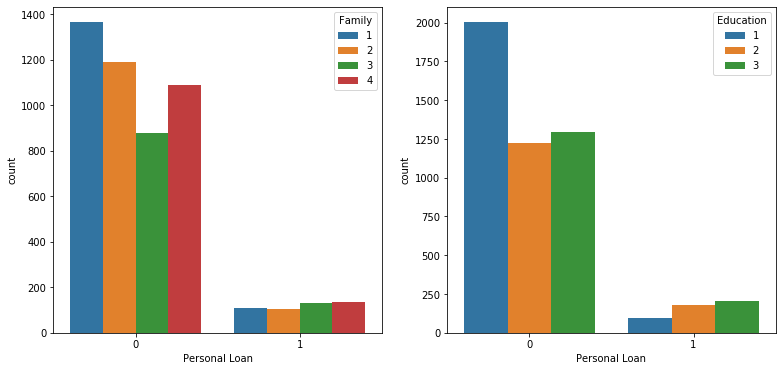

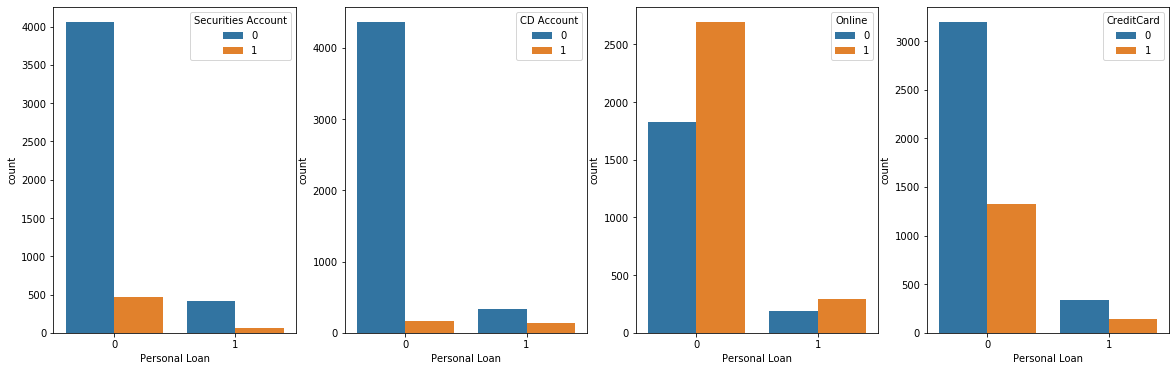

In [134]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.countplot(x='Personal Loan',hue='Family',data=d1)

plt.subplot(1,3,2)
sns.countplot(x='Personal Loan',hue='Education',data=d1)

plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
sns.countplot(x='Personal Loan',hue='Securities Account',data=d1)

plt.subplot(1,4,2)
sns.countplot(x='Personal Loan',hue='CD Account',data=d1)

plt.subplot(1,4,3)
sns.countplot(x='Personal Loan',hue='Online',data=d1)

plt.subplot(1,4,4)
sns.countplot(x='Personal Loan',hue='CreditCard',data=d1)


In [113]:
#sns.pairplot(d1_cont,hue='Personal Loan')

In [135]:
#Group by 
d1.groupby(["Personal Loan"]).mean()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.367257,20.132301,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [119]:
d1.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [123]:
def plot_corr(df, size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

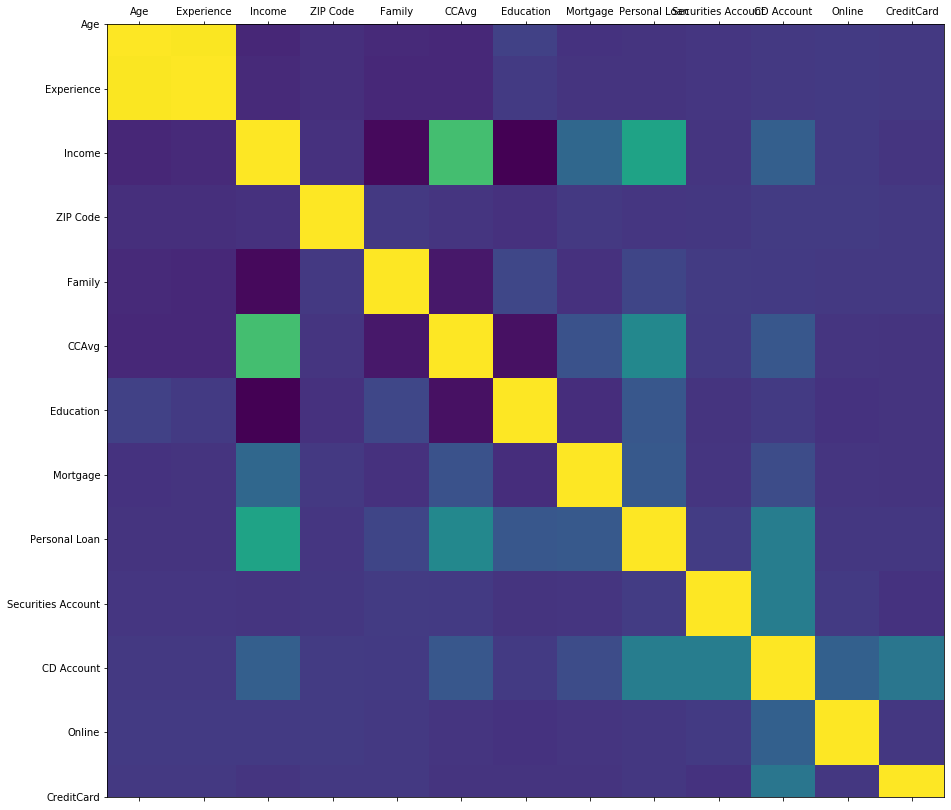

In [124]:
plot_corr(d1)

In [130]:
n_true = len(d1.loc[d1['Personal Loan'] == True])
n_false = len(d1.loc[d1['Personal Loan'] == False])
print("Number of Personal Loan Customers: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of Personal Loan Customers: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of Personal Loan Customers: 480 (9.60%)
Number of Personal Loan Customers: 4520 (90.40%)


# MODEL BUILDING

In [136]:
d1['Personal Loan']=d1['Personal Loan'].astype('category')
d1['ZIP Code']=d1['ZIP Code'].astype('category')
d1['Family']=d1['Family'].astype('category')
d1['Education']=d1['Education'].astype('category')
d1['Securities Account']=d1['Securities Account'].astype('category')
d1['CD Account']=d1['CD Account'].astype('category')
d1['Online']=d1['Online'].astype('category')
d1['CreditCard']=d1['CreditCard'].astype('category')

In [137]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null category
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(8), float64(1), int64(4)
memory usage: 263.8 KB


In [138]:
# Preparing data for Modelling.  Predictor Variable (X) and Result(Y)
X=d1.drop('Personal Loan',axis=1)
Y=d1[['Personal Loan']]

# 4. Splitting the Data

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3)


# 4.1 Logistic Model

In [278]:
from sklearn.linear_model import LogisticRegression

#Building Model:1- the logistic Regression model- 
logisticRegr = LogisticRegression()
lg=logisticRegr.fit(X_train, Y_train)

C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [279]:
# Use score method to get accuracy of model
LG_Score = logisticRegr.score(X_test, Y_test)
print(LG_Score)

0.948


In [ ]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

In [189]:
logisticRegr.classes_

array([0, 1], dtype=int64)

In [235]:
print('intercept:\n',logisticRegr.intercept_)
print('Coef:\n',logisticRegr.coef_)


intercept:
 [-7.03641826e-05]
Coef:
 [[ 8.63750178e-03  6.47080566e-03  3.53689375e-02 -7.11332764e-05
   1.40593460e-02  6.38508081e-03  1.61713688e-02  6.94950181e-04
   7.51055578e-04  4.50482222e-03 -1.63822275e-04  3.79185512e-04]]


In [217]:
# Predit for train 
pred_train = logisticRegr.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(Y_train,pred_train)
print("confusion matrix = \n",mat_train,"\n")
mat_train = classification_report(Y_train,pred_train)
print("classification_report = \n",mat_train)

confusion matrix = 
 [[3073   95]
 [ 228  104]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      3168
           1       0.52      0.31      0.39       332

    accuracy                           0.91      3500
   macro avg       0.73      0.64      0.67      3500
weighted avg       0.89      0.91      0.90      3500



In [219]:
# Predit for test
pred_test = logisticRegr.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
mat_test = confusion_matrix(Y_test,pred_test)
print("confusion matrix = \n",mat_test,"\n")
mat_test = classification_report(Y_test,pred_test)
print("classification_report = \n",mat_test)

confusion matrix = 
 [[1325   27]
 [ 108   40]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1352
           1       0.60      0.27      0.37       148

    accuracy                           0.91      1500
   macro avg       0.76      0.63      0.66      1500
weighted avg       0.89      0.91      0.89      1500



# 4.2 KNN Model

In [237]:
# converting the features into z scores since our data has different units. 
# For KNN Modelling data need to be in same scale and need to be normalized
# It is always adviced to scale numeric attributes in models that calculate distances.
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [252]:
X_KNNtrain, X_KNNtest, Y_KNNtrain, Y_KNNtest = train_test_split(XScaled, Y, test_size=0.30)
#X_KNNtrain, X_KNNtest, Y_KNNtrain, Y_KNNtest = train_test_split(XScaled, Y, test_size=0.30, random_state=1)

In [253]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

# Call Nearest Neighbour algorithm

NNH.fit(X_KNNtrain, Y_KNNtrain)

C:\Users\SRIKANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [272]:
predicted_labels = NNH.predict(X_KNNtest)
KNN_Score=NNH.score(X_KNNtest, Y_KNNtest)
print(KNN_Score)

0.95


In [255]:
# Predit for train 
pred_KNNtrain = NNH.predict(X_KNNtrain)

from sklearn.metrics import classification_report,confusion_matrix
mat_KNNtrain = confusion_matrix(Y_KNNtrain,pred_KNNtrain)
print("confusion matrix = \n",mat_KNNtrain,"\n")
mat_KNNtrain = classification_report(Y_KNNtrain,pred_KNNtrain)
print("classification_report = \n",mat_KNNtrain)

confusion matrix = 
 [[3169    0]
 [   0  331]] 

classification_report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3169
           1       1.00      1.00      1.00       331

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



In [256]:
# Predit for test
pred_KNNtest = NNH.predict(X_KNNtest)

from sklearn.metrics import classification_report,confusion_matrix
mat_KNNtest = confusion_matrix(Y_KNNtest,pred_KNNtest)
print("confusion matrix = \n",mat_KNNtest,"\n")
mat_KNNtest = classification_report(Y_KNNtest,pred_KNNtest)
print("classification_report = \n",mat_KNNtest)

confusion matrix = 
 [[1345    6]
 [  69   80]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1351
           1       0.93      0.54      0.68       149

    accuracy                           0.95      1500
   macro avg       0.94      0.77      0.83      1500
weighted avg       0.95      0.95      0.94      1500



# 4.3 Naive Bayes Model

In [258]:
X_NBtrain, X_NBtest, Y_NBtrain, Y_NBtest = train_test_split(X, Y, test_size=0.3)

In [260]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
NB_model = GaussianNB()

NB_model.fit(X_NBtrain, Y_NBtrain)

C:\Users\SRIKANT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [269]:
NB_predict= NB_model.predict(X_NBtest)
NB_Score=NB_model.score(X_NBtest, Y_NBtest)
print(NB_Score)

0.8893333333333333


In [264]:
# Predit for train 
pred_NBtrain = NB_model.predict(X_NBtrain)

from sklearn.metrics import classification_report,confusion_matrix
mat_NBtrain = confusion_matrix(Y_NBtrain,pred_NBtrain)
print("confusion matrix = \n",mat_NBtrain,"\n")
mat_NBtrain = classification_report(Y_NBtrain,pred_NBtrain)
print("classification_report = \n",mat_NBtrain)

confusion matrix = 
 [[2923  249]
 [ 139  189]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      3172
           1       0.43      0.58      0.49       328

    accuracy                           0.89      3500
   macro avg       0.69      0.75      0.72      3500
weighted avg       0.91      0.89      0.90      3500



In [265]:
# Predit for test
pred_NBtest = NB_model.predict(X_NBtest)

from sklearn.metrics import classification_report,confusion_matrix
mat_NBtest = confusion_matrix(Y_NBtest,pred_NBtest)
print("confusion matrix = \n",mat_NBtest,"\n")
mat_NBtest = classification_report(Y_NBtest,pred_NBtest)
print("classification_report = \n",mat_NBtest)

confusion matrix = 
 [[1241  107]
 [  59   93]] 

classification_report = 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1348
           1       0.47      0.61      0.53       152

    accuracy                           0.89      1500
   macro avg       0.71      0.77      0.73      1500
weighted avg       0.91      0.89      0.90      1500



In [285]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(Y_NBtest,pred_NBtest)
print(acc1)

0.8893333333333333


# Model comparison

In [307]:
# Comapring Model Score on Test Data
print("Model Score Comparison")
print("Logistics Score  :",LG_Score)
print("KNN Score        :",KNN_Score)
print("Naive Bayes Score:",NB_Score)
print("\n")

from sklearn.metrics import accuracy_score
LG_acc=accuracy_score(Y_test,pred_test)
KN_acc=accuracy_score(Y_KNNtest,pred_KNNtest)
NB_acc=accuracy_score(Y_NBtest,pred_NBtest)

print("Accuracy Comparison")
print("Logistics   :",LG_acc)
print("KNN         :",KN_acc)
print("Naive Bayes :",NB_acc)
print("\n")

from sklearn.metrics import precision_score
LG_pre=precision_score(Y_test,pred_test)
KN_pre=precision_score(Y_KNNtest,pred_KNNtest)
NB_pre=precision_score(Y_NBtest,pred_NBtest)

print("Precision Comparison")
print("Logistics   :",LG_pre)
print("KNN         :",KN_pre)
print("Naive Bayes :",NB_pre)
print("\n")

from sklearn.metrics import recall_score
LG_rec=recall_score(Y_test,pred_test)
KN_rec=recall_score(Y_KNNtest,pred_KNNtest)
NB_rec=recall_score(Y_NBtest,pred_NBtest)

print("Recall Comparison")
print("Logistics   :",LG_rec)
print("KNN         :",KN_rec)
print("Naive Bayes :",NB_rec)

# F1 Score Comparison
LG_F1=2*((LG_pre*LG_rec)/(LG_pre+LG_rec))
KN_F1=2*((KN_pre*KN_rec)/(KN_pre+KN_rec))
NB_F1=2*((NB_pre*NB_rec)/(NB_pre+NB_rec))

print("\n")
print("F1 Score Comparison")
print("Logistics   :",LG_F1)
print("KNN         :",KN_F1)
print("Naive Bayes :",NB_F1)

Model Score Comparison
Logistics Score  : 0.948
KNN Score        : 0.95
Naive Bayes Score: 0.8893333333333333


Accuracy Comparison
Logistics   : 0.864
KNN         : 0.95
Naive Bayes : 0.8893333333333333


Precision Comparison
Logistics   : 0.08955223880597014
KNN         : 0.9302325581395349
Naive Bayes : 0.465


Recall Comparison
Logistics   : 0.040268456375838924
KNN         : 0.5369127516778524
Naive Bayes : 0.6118421052631579


F1 Score Comparison
Logistics   : 0.05555555555555556
KNN         : 0.6808510638297872
Naive Bayes : 0.5284090909090909


In [308]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_KNNtrain, Y_KNNtrain)
    scores.append(NNH.score(X_KNNtest, Y_KNNtest))

C:\Users\SRIKANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\SRIKANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\SRIKANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\SRIKANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

C:\Users\SRIKANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\SRIKANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\SRIKANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\SRIKANT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

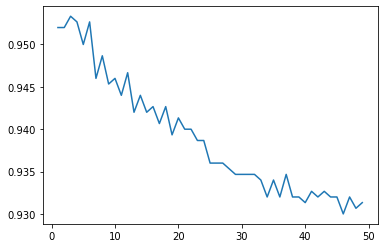

In [310]:
plt.plot(range(1,50),scores)